# Cálculo posiciones 

In [ ]:
def CurvaturayA(strains,posiciones, erre, angulos, N,L, fijo):
  import numpy as np 
  e_1 , e_2, e_3, e_4 = [],[],[],[]
  for i in range(0, len(strains[0:])):
    e_1.append(strains[i][0]) , e_2.append(strains[i][1]) , e_3.append(strains[i][2]), e_4.append(strains[i][3])
  
  if fijo==1: 
    e_1 , e_2, e_3, e_4 = np.array(e_1) , np.array(e_2), np.array(e_3), np.array(e_4)
    e_1 , e_2, e_3, e_4 = np.append(0,e_1), np.append(0,e_2), np.append(0,e_3), np.append(0,e_4)
    posiciones = np.append(0,np.array(posiciones))
  elif fijo==2: 
    e_1 , e_2, e_3, e_4 = np.array(e_1) , np.array(e_2), np.array(e_3), np.array(e_4)
    e_1 , e_2, e_3, e_4 = np.append(e_1,0), np.append(e_2,0), np.append(e_3,0), np.append(e_4,0)
    posiciones = np.append(np.array(posiciones), L)
  elif fijo==12: 
    e_1 , e_2, e_3, e_4 = np.array(e_1) , np.array(e_2), np.array(e_3), np.array(e_4)
    e_1 , e_2, e_3, e_4 = np.append(0,e_1), np.append(0,e_2), np.append(0,e_3), np.append(0,e_4)
    e_1 , e_2, e_3, e_4 = np.append(e_1,0), np.append(e_2,0), np.append(e_3,0), np.append(e_4,0)
    posiciones = np.append(0,np.array(posiciones))
    posiciones = np.append(np.array(posiciones), L)

  from scipy import interpolate
  interp_strains1 = interpolate.interp1d(posiciones, e_1, kind='cubic')
  interp_strains2 = interpolate.interp1d(posiciones, e_2, kind='cubic')
  interp_strains3 = interpolate.interp1d(posiciones, e_3, kind='cubic')
  interp_strains4 = interpolate.interp1d(posiciones, e_4, kind='cubic')

  x = np.linspace(posiciones[0],posiciones[-1] ,N)

  e_1p, e_2p, e_3p, e_4p = interp_strains1(x), interp_strains2(x), interp_strains3(x) , interp_strains4(x)
  # if any(np.array(e_1p)==0):
  #   e_1p = np.delete(e_1p, e_1p==0)
  
  # import matplotlib.pyplot as plt 
  # fig = plt.figure(figsize= (12,12))
  # ax = fig.add_subplot( )
  # ax.plot(x, e_1p, color = "r" ,label = "e_1", alpha = 0.4)
  # ax.scatter(posiciones, e_1)
  # ax.scatter(posiciones, e_2)
  # ax.scatter(posiciones, e_3)
  # ax.scatter(posiciones, e_4)

  # ax.plot(x, e_2p, color = "g" ,label = "e_2", alpha = 0.4)
  # ax.plot(x, e_3p, color = "b" ,label = "e_3", alpha = 0.4)
  # ax.plot(x, e_4p, color = "m" ,label = "e_4", alpha = 0.4)
  # ax.set_title("Interpolated Strains ")
  # plt.show()

  vector_kapp = []
  vector_k = [] 
  vector_theta = []
  theta_1 , theta_2, theta_3, theta_4 =  angulos[0], angulos[1], angulos[2], angulos[3]
  r1,r2,r3,r4 = erre[0],erre[1],erre[2],erre[3] 
  for i in range(0, len(e_1p)): 
    k_1 , k_2, k_3, k_4 = np.array([ -e_1p[i]/r1*np.cos(theta_1), - e_1p[i]/r1*np.sin(theta_1) ]) , np.array([-e_2p[i]/r2*np.cos(theta_2),  - e_2p[i]/r2*np.sin(theta_2)]), np.array([-e_3p[i]/r3*np.cos(theta_3),  - e_3p[i]/r3*np.sin(theta_3)]), np.array( [-e_4p[i]/r4*np.cos(theta_4),  - e_4p[i]/r4*np.sin(theta_4)])  
    k_app = np.array( k_1 + k_2 + k_3 + k_4 ) 
    k = 2*np.linalg.norm(k_app)/4   

    if k_app[0] == 0 and k_app[1] == 0 : 
      theta = 0 
      continue

    else: 
      ang = (k_app@np.array([1,0])) /  (np.linalg.norm(k_app))
      theta = np.arccos(  (k_app@np.array([1,0])) /  (np.linalg.norm(k_app)) )
      vector_kapp.append(k_app)
      vector_k.append(k)
      vector_theta.append(theta)  
 
  torsion = []
  for i in range(0,len(vector_theta)-1): 
    torsion.append( (vector_theta[i+1]-vector_theta[i])/(len(vector_theta)-1) ) 


  return vector_k[1:], vector_theta[1:], vector_kapp[1:], torsion

In [ ]:
def frenet(curvatura, torsion, normal, L):
  if len(curvatura)!=len(torsion):
    return "El vector curvatura y el vector de torsión deben tener el mismo número de elementos"
  T, B , N = [],[],[] # CREACIÓN DE LOS VECTORES VACIOS DEL TRIEDRO Y LA POSICION
  r = []
  s = L/(len(curvatura)) # CALCULO DE LA LONGITUD DE CURVA PARA CADA ITERACION 
  for i in range(0,len(curvatura)): 
    k = curvatura[i] # ASIGNACIÓN DE LA CURVATURA Y TORSIÓN PARA CADA ITERACION
    tau = torsion[i]
    if i == 0:  # CALCULO DEL TRIEDRO Y POSICION PARA LA PRIMERA ITERACION 
      r_0 = np.array([0,0,0]) # PARTIMOS DE 0 
      N_0 = np.append(normal, 0)  # VECTOR EN EL PLANO XY
      N_0 = N_0/np.linalg.norm(N_0) #NORMALIZACIÓN DE  LOS VECTORES
      T_0 = np.array( [ 0,0,1] ) # VECTOR EN DIRECCION Z
      T_0 = T_0/np.linalg.norm(T_0)
      B_0 = np.cross(T_0, N_0) # PRODUCTO VECTORIAL DE T Y N 
      B_0 = B_0/np.linalg.norm(B_0)
    
      r0,T0,B0,N0 = r_0, T_0, B_0, N_0 # ASIGNACION DE LOS VECTORES INICIALES COMO LOS CREADOS ARRIBA
    else: 
      r0,T0,B0,N0 = ri, Ti, Bi, Ni # ASIGNACION DE LOS VECTORES INICIALES COMO LOS DE LA ITERACIÓN ANTERIOR
    
    Ni = (s*tau*B0 -s*k*T0 + N0  )/(1 + s*s*tau*tau + s*s*k*k) # APLICACIÓN DE LAS FÓRMULAS
    Ti = s*k*Ni + T0
    Bi = -s*tau*Ni + B0
    ri = s*Ti + r0

    Ni = Ni/np.linalg.norm(Ni) # NORMALIZACIÓN DE LOS VECTORES CREADOS
    Ti = Ti/np.linalg.norm(Ti)
    Bi = Bi/np.linalg.norm(Bi)

    r.append(ri) # ADICIÓN DE LOS VECTORES CREADOS
    N.append(Ni)
    B.append(Bi)
    T.append(Ti) 
  #CODIGO PARA LA REPRESENTACION, PLOT
  # import matplotlib.pyplot as plt
  # fig2 = plt.figure(figsize= (12,12))
  # ax2 = fig2.add_subplot( projection='3d')
  # fig, ax = plt.subplots(3 , 1 , figsize= (12,36))
  # for i in range(0,len(r)):
  #   ax2.scatter(r[i][0], r[i][1], r[i][2])
  #   ax[0].scatter(r[i][0], r[i][1])
  #   ax[1].scatter(r[i][1], r[i][2])
  #   ax[2].scatter(r[i][0], r[i][2])
    
  # ax2.plot([r[0][0], r[-1][0]], [r[0][1], r[-1][1]], [r[0][2] , r[-1][2] ])
  # ax[0].plot([r[0][0], r[-1][0]], [r[0][1], r[-1][1]] )
  # ax[1].plot( [r[0][1], r[-1][1]], [r[0][2] , r[-1][2] ])
  # ax[2].plot([r[0][0], r[-1][0]], [r[0][2] , r[-1][2] ])
  # ax2.set_title("3D Projection ")
  # ax[0].set_title("Proyeccion XY ")
  # ax[1].set_title("Proyeccion YZ ")
  # ax[2].set_title("Proyeccion XZ ")
  # plt.grid(visible = True)  
  return r 

In [ ]:
def Metmatrices(curvatura, angulo, L , r ):
  if len(curvatura)!=len(angulo):
    return "El vector curvatura y el vector de ángulos deben tener el mismo número de elementos"
  eje_n = []
  ang = []
  for j in range(0,len(angulo)): # el ángulo se mide con respecto al punto anterior
    if j ==0: 
      ang.append( angulo[j] )
    else:
      ang.append(angulo[j] - angulo[j-1])  

  p0s, p1s , p2s, p3s, p4s = [],[],[],[],[]
  p0n = np.array([0,0,0,1])
  p1n = np.array([r,0,0,1])
  p2n = np.array([0,r,0,1])
  p3n = np.array([-1*r,0,0,1])
  p4n = np.array([0,-1*r,0,1])
  s = L/len(curvatura)

  for i in range(0,len(curvatura)): 
    radio = 1/(curvatura[i]) 
    theta = ang[i] 
    phi = s * (curvatura[i]) #La curvatura ya está en metros de la primera función
    
    A = np.array([ [np.cos(theta)*np.cos(phi), -np.sin(theta), np.cos(theta)*np.sin(phi), radio*(1-np.cos(phi))*np.cos(theta)],
                   [np.sin(theta)*np.cos(phi), np.cos(theta), np.sin(theta)*np.sin(phi), radio*(1-np.cos(phi))*np.sin(theta)],
                   [-np.sin(phi), 0, np.cos(phi), radio*np.sin(phi)],
                   [0,0,0,1]  ]) # MATRIZ DEL Método
    if i ==(0):
      A0 = A
    else: 
      A0 = A0@A # Cálculo de la matriz A en el sistema de referencia del origen
   
    Op0j = A0@p0n.T   #Cálculo de las posiciones de las fibras y el eje neutro
    Op1j = A0@p1n.T
    Op2j = A0@p2n.T
    Op3j = A0@p3n.T
    Op4j = A0@p4n.T
    
    Op0j = np.delete(Op0j , -1) # Se elimina la dimensión sin información
    Op1j, Op2j, Op3j, Op4j = np.delete(Op1j , -1), np.delete(Op2j , -1) , np.delete(Op3j , -1), np.delete(Op4j , -1)
    p0s.append(Op0j) # Se añaden las posiciones a los vectores finales
    p1s.append(Op1j)
    p2s.append(Op2j)
    p3s.append(Op3j)
    p4s.append(Op4j)
    
    eje_n.append( (Op1j + Op2j + Op3j + Op4j)/4  ) # Se calcula el eje neutro como la ponderación de los 4 sensores. 

  # import matplotlib.pyplot as plt #Si se ponen dentro del loop se pintan progresivamente y queda chulo 
  # fig = plt.figure(figsize= (12,12))
  # ax = fig.add_subplot( projection='3d')
  # for i in range(0,len(p0s)):
  #   ax.scatter(p0s[i][0], p0s[i][1],  p0s[i][2] , c = "black")
  #   ax.scatter(p0s[i][0], p0s[i][1], 0 , c = "r", marker = ".", alpha = 0.3)
  #   #ax.scatter(p0s[i][0], p0s[i][1] ,p0s[i][2] , c = "r", marker = ".")
  #   #ax.scatter(0 ,p0s[i][1] ,p0s[i][2] , c = "r")
  # ax.plot( [ p0s[0][0],p0s[-1][0] ],[ p0s[0][1], p0s[-1][1] ] ,[ p0s[0][2], p0s[-1][2] ])
  # plt.grid(visible = True)
  # ax.set_title("Método de las Matrices")
  # plt.show()
  return np.array(eje_n), p0s, p1s,p2s,p3s,p4s

In [ ]:
#Usan los ángulos de Euler (alpha, beta, gamma) = (phi,theta,psi)
def rotx(phi):
  return np.array( [[1,0,0],[0, np.cos(phi), -np.sin(phi)],[0,np.sin(phi),np.cos(phi)]] )
def roty(thet): 
  return np.array([[np.cos(thet),0,np.sin(thet)],[0,1,0],[-np.sin(thet),0,np.cos(thet)]] )
def rotz(gamma): 
  return np.array([[np.cos(gamma),-np.sin(gamma),0],[np.sin(gamma),np.cos(gamma),0],[0,0,1]] )
#MatrizEuler : rotz*rotx*roty 

In [ ]:
import numpy as np
Datos = np.array([[0, 35.8284,	95.3362,	155.0938,	214.9890,	274.8244,	320.1086,	286.4778,	221.0992	,158.4492	,97.5707,	37.9462,0],
[ 0,0,	0,	0	,0	,0	,0,	0,	0	,0	,0	,0,0], [0, -29.2314,	-91.1457,	-151.6907,	-210.2951,	-266.1124,	-364.9766,	-277.3659,	-214.5882,	-153.3675,	-95.3845,	-32.9161,0],
[0, 0,	0,	0,	0,	0	,0,	0,	0	,0	,0,	0 ,0]
 ])
Datos = Datos.T

In [ ]:
import math 
k, theta, kapp, tor = CurvaturayA(Datos, np.linspace(0,2.8, 13), [0.0287*10**6,0.0287*10**6,0.0287*10**6,0.0287*10**6] , [0 , math.pi/2 , math.pi, 3*math.pi/2 ],10**3,2.8, 0)
pos = frenet(k,tor,kapp[1],2.8)
pos2 = []
for i in range(0,len(pos)):
  pos2.append([pos[i][0]+5, pos[i][1], pos[i][2]])
  

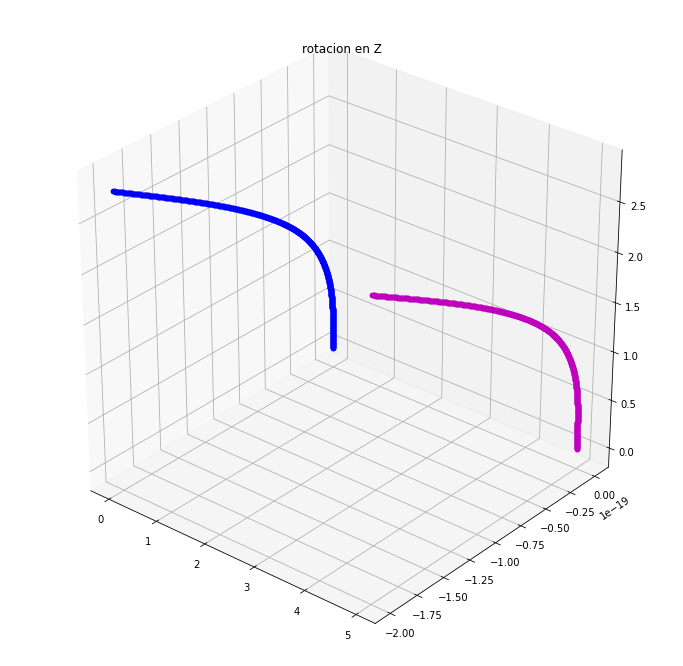

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
for i in range(0,len(pos)):
  ax.scatter(pos[i][0], pos[i][1], pos[i][2], c = "b")
  ax.scatter(pos2[i][0], pos2[i][1], pos2[i][2], c = "m")

plt.grid(visible = True)
ax.set_title("rotacion en Z")
ax.view_init(azim=-50, elev=30)
plt.show()

# Tensorflow 

In [ ]:
pos[0], pos[1]

(array([-4.34637366e-11, -4.02246419e-28,  2.80842528e-03]),
 array([-1.56010756e-10, -1.44384199e-27,  5.61685055e-03]))

In [ ]:
b = tf.Tensor(shape = (2,997,3))

TypeError: ignored

In [ ]:
import tensorflow as tf
a = tf.constant([list(pos),list(pos2)])
a

<tf.Tensor: shape=(2, 997, 3), dtype=float64, numpy=
array([[[-4.34637366e-11, -4.02246419e-28,  2.80842528e-03],
        [-1.56010756e-10, -1.44384199e-27,  5.61685055e-03],
        [-3.65828294e-10, -3.38565279e-27,  8.42527583e-03],
        ...,
        [-2.14415341e-02, -1.98436236e-19,  2.79425396e+00],
        [-2.14848583e-02, -1.98837191e-19,  2.79706206e+00],
        [-2.15281826e-02, -1.99238147e-19,  2.79987015e+00]],

       [[ 5.00000000e+00, -4.02246419e-28,  2.80842528e-03],
        [ 5.00000000e+00, -1.44384199e-27,  5.61685055e-03],
        [ 5.00000000e+00, -3.38565279e-27,  8.42527583e-03],
        ...,
        [ 4.97855847e+00, -1.98436236e-19,  2.79425396e+00],
        [ 4.97851514e+00, -1.98837191e-19,  2.79706206e+00],
        [ 4.97847182e+00, -1.99238147e-19,  2.79987015e+00]]])>

In [ ]:
a[0,:]

<tf.Tensor: shape=(997, 3), dtype=float64, numpy=
array([[-4.34637366e-11, -4.02246419e-28,  2.80842528e-03],
       [-1.56010756e-10, -1.44384199e-27,  5.61685055e-03],
       [-3.65828294e-10, -3.38565279e-27,  8.42527583e-03],
       ...,
       [-2.14415341e-02, -1.98436236e-19,  2.79425396e+00],
       [-2.14848583e-02, -1.98837191e-19,  2.79706206e+00],
       [-2.15281826e-02, -1.99238147e-19,  2.79987015e+00]])>

In [ ]:
import tensforflow_graphics as tfg
tfg.math.interpolation.bspline.interpolate(
    knots: a,
    positions: ,
    degree: 3,
    cyclical: False,
    name: str = 'interpol_sup'
) -> tf.Tensor


# Classic Interpolation

In [ ]:
a = interpolate.interp1d(np.array([0,3,4,5]), np.array([-2,0,3, 4]), kind='cubic')

In [ ]:
from scipy import interpolate
N = 100
x = np.linspace(0,N,N)
xs = [] #np.empty((N,len(pos)))
ys = [] #np.empty((N,len(pos)))
zs = [] #np.empty((N,len(pos)))
for i in range(0,len(pos)): 
  i_x = interpolate.interp1d([0,N], [pos[i][0], pos2[i][0]], kind='linear') # para la cúbica hacen falta 4 puntos mínimo 
  i_y = interpolate.interp1d([0,N], [pos[i][1], pos2[i][1]], kind='linear')
  i_z = interpolate.interp1d([0,N], [pos[i][2], pos2[i][2]], kind='linear')
  xs.append(i_x(x)) ,  ys.append( i_y(x)),  zs.append(i_z(x))  


In [ ]:
x = np.linspace(0,1,3)
np.meshgrid(x, np.linspace(1,10,4));

In [ ]:
final = []
for j in range(0,N): 
  for i in range(0,len(pos)):
    final.append([xs[i][j], ys[i][j], zs[i][j]])

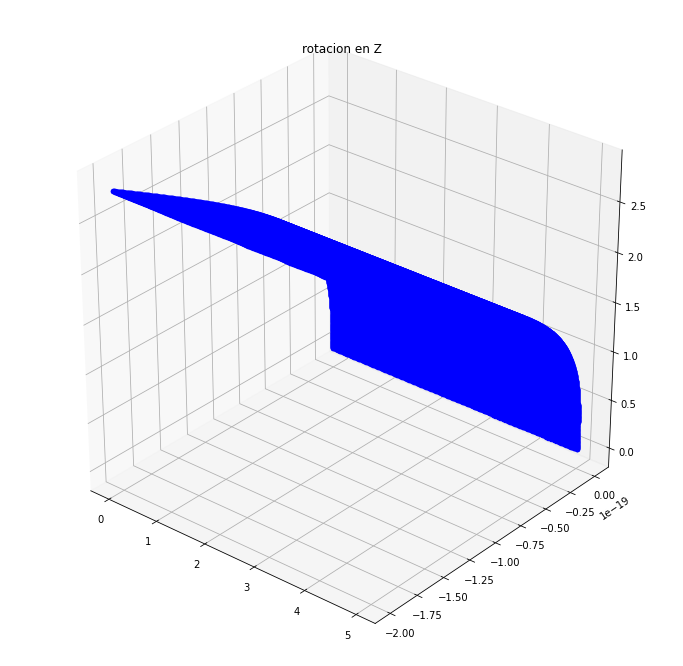

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
for j in range(0,len(final)): 
    ax.scatter(final[j][0], final[j][1], final[j][2], c = "b")

plt.grid(visible = True)
ax.set_title("rotacion en Z")
ax.view_init(azim=-50, elev=30)
plt.show()

## Artículos 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6339136/

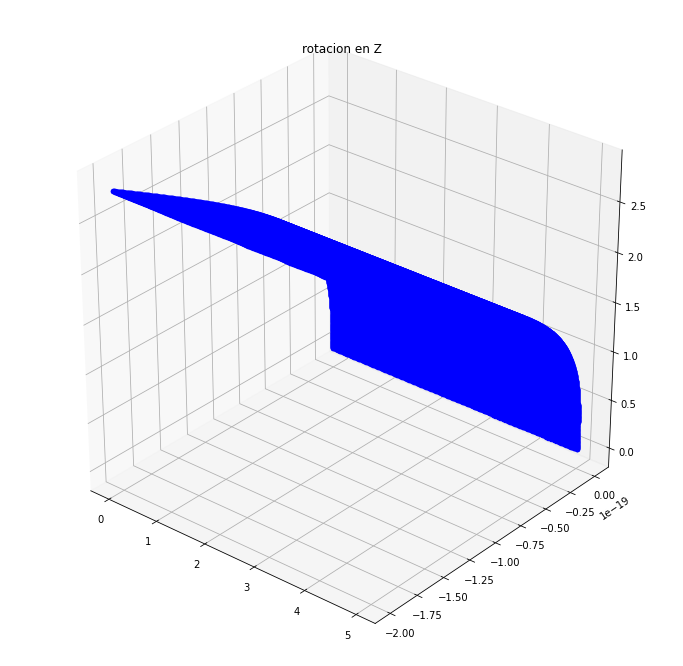

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
for j in range(0,100): 
  for i in range(0,len(pos)):
    ax.scatter(xs[i][j], ys[i][j], zs[i][j], c = "b")

plt.grid(visible = True)
ax.set_title("rotacion en Z")
ax.view_init(azim=-50, elev=30)
plt.show()

In [ ]:
import matplotlib.tri as mtri


100

In [ ]:
from numpy import meshgrid
x,y = meshgrid([0,1,2,3,4,5],[0,1,2,3,4,5]) #superficie sobre el plano para calcular puntos posteriores

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html

In [ ]:
def func(x, y):

    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

from scipy.interpolate import griddata

grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

NameError: ignored

# Regresiones 

https://www.maplesoft.com/support/help/maple/view.aspx?path=applications%2FBivariatePolynomialRegression

Usar SKlearn


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

data = np.array(
    [[0, 0, 1],
     [1, 1, 2],
     [2, 1, 3],
     [3, 0, 5],
     [4, 0, 2],
     [5, 1, 3],
     [6, 0, 7]]
)

def func(X, A, B, C, D, E, F):
    # unpacking the multi-dim. array column-wise, that's why the transpose
    x, y, z = X.T

    return (A * x ** 2) + (B * y ** 2) + (C * x * y) + (D * x) + (E * y) + F

popt, _ = curve_fit(func, data, data[:,2])


In [ ]:
popt

array([ 5.95238095e-02,  2.00444649e+03, -7.00000000e-01,  5.21428571e-01,
       -2.00304649e+03,  1.14761905e+00])

In [ ]:
X = np.zeros((2,2*len(pos)))
Y = np.zeros(2*len(pos))
for i in range(len(pos)):
  X[0,i] = pos[i][0]
  X[1,i] = pos[i][1]
  Y[i] = pos[i][2]
for j in range(len(pos2)):
  X[0,j+len(pos)] = pos2[j][0]
  X[1,j+len(pos)] = pos2[j][1]
  Y[j+len(pos)] =  pos2[j][2]


In [ ]:
min_1x, min_1y = X[0,0], X[1,0]
max_1x, max_1y =X[0,len(pos)-1], X[1,len(pos)-1]
min_2x, min_2y = X[0,len(pos)], X[1,len(pos)]
max_2x, max_2y =X[0,2*len(pos)-1], X[1,2*len(pos)-1]

min_x, max_x = min(min_1x,min_2x) , max(max_1x, max_2x)
min_y, max_y = min(min_1y,min_2y) , max(max_1y, max_2y)

X_pred = np.meshgrid(np.linspace(min_x, max_x, 200),np.linspace(min_y, max_y, 200) )

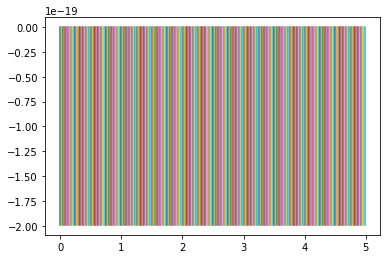

In [ ]:
plt.plot(X_pred[0], X_pred[1])
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_var = poly.fit_transform(X.T)

reg = linear_model.LinearRegression()

reg.fit(poly_var, Y.T)
#score = model.score(poly_var_test, res_test)

In [ ]:
poly.fit_transform([[2,1],[2,1]])

array([[1., 2., 1., 4., 2., 1.],
       [1., 2., 1., 4., 2., 1.]])

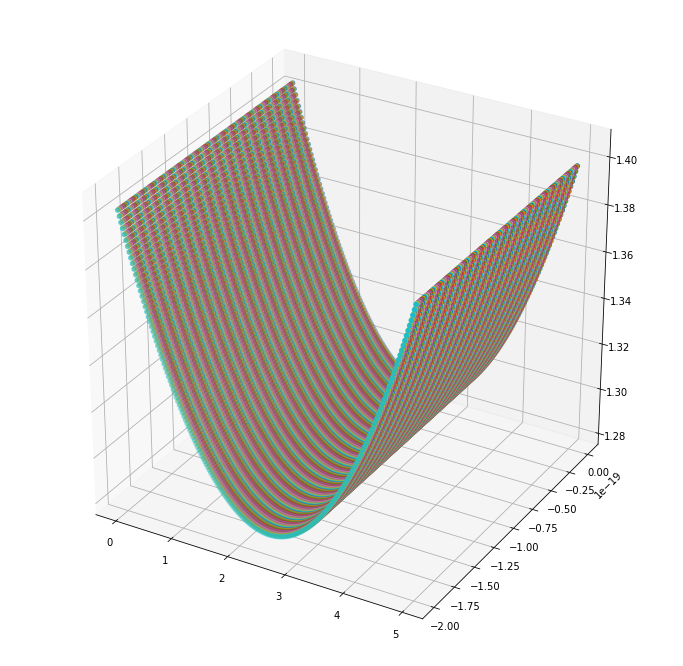

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')
for i in range(len(X_pred[1][0])): 
  X_tran = np.zeros((2,len(X_pred[0][0])))
  X_tran[0,:] , X_tran[1,:] =  X_pred[0][i] , X_pred[1][i] 
  y_p = reg.predict( poly.fit_transform(X_tran.T))
  ax.scatter(X_pred[0][i] ,X_pred[1][i], y_p)

plt.show()

In [ ]:
y_p= model.predict( poly.fit_transform(X_tran.T))

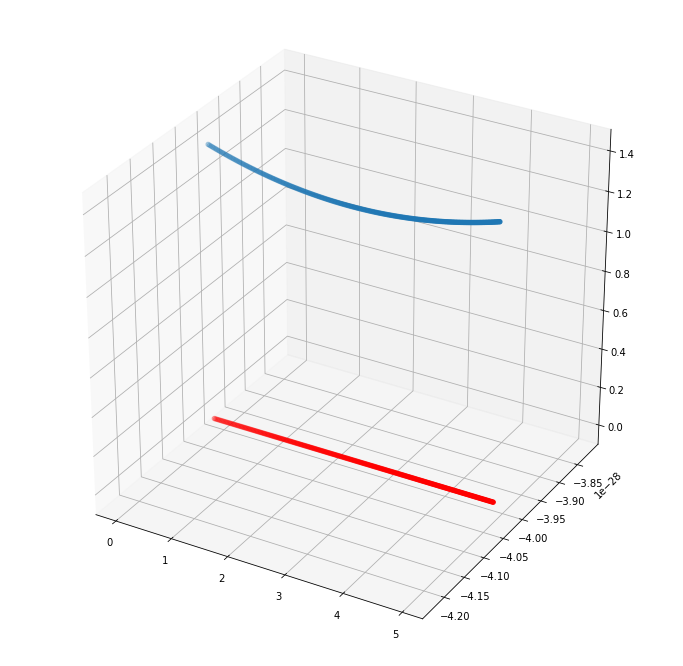

In [ ]:
fig = plt.figure(figsize= (12,12))
ax = fig.add_subplot( projection='3d')

ax.scatter(X_tran.T[:,0] ,X_tran.T[:,1], y_p)
ax.scatter(X_tran.T[:,0] ,X_tran.T[:,1], 0 , c = "r")

plt.show()

In [ ]:
np.shape(poly_var) , np.shape(X)

((1994, 6), (2, 1994))

In [ ]:
np.shape(X_pred[1][0])

(200,)

In [ ]:
X_pred[1][-1] , X_pred[1][0]

(array([-1.99238147e-19, -1.99238147e-19, -1.99238147e-19, -1.99238147e-19,
        -1.99238147e-19, -1.99238147e-19, -1.99238147e-19, -1.99238147e-19,
        -1.99238147e-19, -1.99238147e-19, -1.99238147e-19, -1.99238147e-19,
        -1.99238147e-19, -1.99238147e-19, -1.99238147e-19, -1.99238147e-19,
        -1.99238147e-19, -1.99238147e-19, -1.99238147e-19, -1.99238147e-19,
        -1.99238147e-19, -1.99238147e-19, -1.99238147e-19, -1.99238147e-19,
        -1.99238147e-19, -1.99238147e-19, -1.99238147e-19, -1.99238147e-19,
        -1.99238147e-19, -1.99238147e-19, -1.99238147e-19, -1.99238147e-19,
        -1.99238147e-19, -1.99238147e-19, -1.99238147e-19, -1.99238147e-19,
        -1.99238147e-19, -1.99238147e-19, -1.99238147e-19, -1.99238147e-19,
        -1.99238147e-19, -1.99238147e-19, -1.99238147e-19, -1.99238147e-19,
        -1.99238147e-19, -1.99238147e-19, -1.99238147e-19, -1.99238147e-19,
        -1.99238147e-19, -1.99238147e-19, -1.99238147e-19, -1.99238147e-19,
        -1.9

In [ ]:
def poly_matrix(X, grad):
  n, p = X.shape
  # Columna de 1s.
  Xt = np.ones((n,1))
  # Unimos la matriz X elevada a 
  # la potencia correspondiente.
  for g in range(grad):
    Xt = np.hstack((Xt, np.power(X, g+1)))
  return Xt

In [ ]:
np.shape(X_tran)

(2, 200)

# Visualizaciones

https://vtk.org/download/
https://github.com/Kitware/ipyvtklink

https://github.com/pyvista/pyvista/issues/


In [ ]:
!pip install -q piglet pyvirtualdisplay
!pip install -q pyvista
!apt-get -qq install xvfb


     |████████████████████████████████| 67 kB 2.2 MB/s 
     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 88.3 MB 92 kB/s 
     |████████████████████████████████| 1.1 MB 13.5 MB/s 
     |████████████████████████████████| 271 kB 51.3 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 144 kB 48.8 MB/s 
Selecting previously unselected package xvfb.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
#!pip install ipyvtklink
from pyvirtualdisplay import Display
display = Display(visible=0, size=(600, 400))
display.start()

# from google.colab import output
# output.enable_custom_widget_manager()

/usr/local/lib/python3.7/dist-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


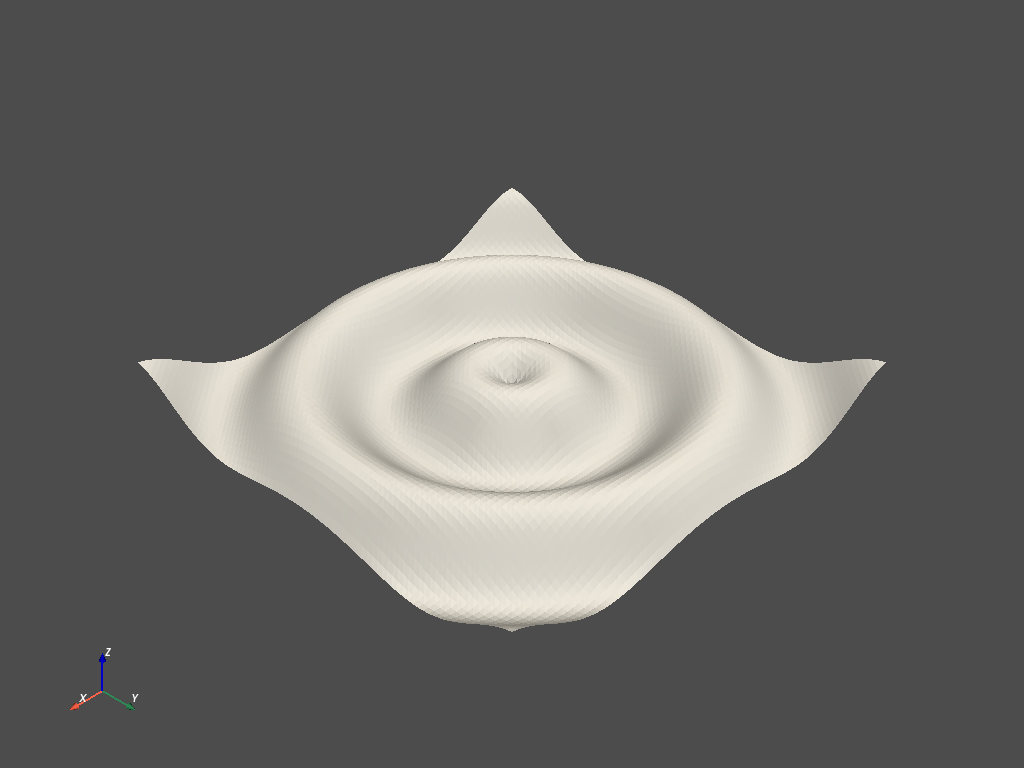

In [ ]:
import pyvista as pv
import numpy as np
x = np.arange(-10, 10, 0.25)
y = np.arange(-10, 10, 0.25)
x, y = np.meshgrid(x, y)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r)

grid = pv.StructuredGrid(x, y, z) #X, Y , Z matrices 
grid.plot(notebook=True)